In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import font_manager, rc
rc('font', family='New Gulim')
import numpy as np

In [3]:
data=pd.read_csv('C:/Users/juyeo/Desktop/store/KT_data_20200717/index.csv')

In [4]:
data

,period,catl,catm,age,gender,sido,sigungu,cgi
0,201901,건강/의료용품,건강관리용품,20,F,서울,관악구,115.374642
1,201901,건강/의료용품,건강관리용품,20,F,서울,광진구,119.596454
2,201901,건강/의료용품,건강관리용품,20,F,서울,도봉구,156.992847
3,201901,건강/의료용품,건강관리용품,20,F,서울,동작구,58.342726
4,201901,건강/의료용품,건강관리용품,20,F,서울,마포구,145.147595
...,...,...,...,...,...,...,...,...
127520,202005,화장품,화장품,all,all,서울,강서구,51.365660
127521,202005,화장품,화장품,all,all,서울,관악구,61.997865
127522,202005,화장품,화장품,all,all,서울,금천구,82.198402
127523,202005,화장품,화장품,all,all,서울,도봉구,35.875600


In [5]:
def get_gulist(word):
    gulist = data[data['sigungu'] == word].reset_index(drop=True)
    return gulist


In [6]:
# 연령별 케이스 추출

def get_case(word, age):
    gulist = get_gulist(word)
    cases = gulist[gulist['age'] == age]
    return cases


In [7]:
# 연령, 성별, 품목별(카테고리 중분류) 성장지수 변화 꺾은선그래프

def get_plot(word, age, sex, catm):
    case = get_case(word, age)
    
    a = case[case['catm'] == catm] # 여기 catm만 원하는 카테고리로 바꾸고 실행
    b = a[a['gender'] == sex][['period', 'cgi']]

    x_values = range(len(b))

    y_values1 = b['cgi']
    y_values2 = []
    for i in range(len(x_values)):
        y_values2.append(100)

    plt.figure(figsize=(20, 4))
    plt.plot(x_values, y_values1, y_values2)

    ax = plt.subplot()
    ax.set_xticks(range(len(x_values)))
    ax.set_xticklabels(b['period'])

    plt.show()


In [8]:
def get_plot2(word, age, sex, period):
    case = get_case(word, age)
    
    a = case[case['period'] == period] # 여기 catm만 원하는 카테고리로 바꾸고 실행
    b = a[a['gender'] == sex][['catm', 'cgi']]

    x_values = range(len(b))

    y_values1 = b['cgi']
    y_values2 = []
    for i in range(len(x_values)):
        y_values2.append(100)

    labels = b['catm']
    index = np.arange(len(labels))

    plt.barh(index, y_values1, color='red', alpha=0.5)
    plt.title('자치구 = ' + word + ' / 연령 = ' + age + ' / 성별 = ' + sex, fontsize=15)
    plt.yticks(index, labels, fontsize=10)

    plt.show()

In [9]:
# # 실행부
# 
# '건강/의료용품': ['건강관리용품'],  
# '식품': ['가공식품', '기호식품', '담배', '빙과류', '빵류', '신선식품', '유제품류', '음료', '제과류', '주류'],  
# '일용품': ['생활용품', '애완동물용품'],  
# '화장품': ['기타화장품', '바디/헤어용품', '뷰티소품', '화장품'] 
#  
# **그래프가 비어있으면 카테고리 정보가 없는거니까 다른 카테고리로 넣어서 해보면 됨!**  
#모든 카테고리 다 해볼 필요 없고 여러개 해보면서 결과 눈에 띄는것만 분석에 사용하면 될듯

<ipython-input-7-5e66f72101b8>:19: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot()


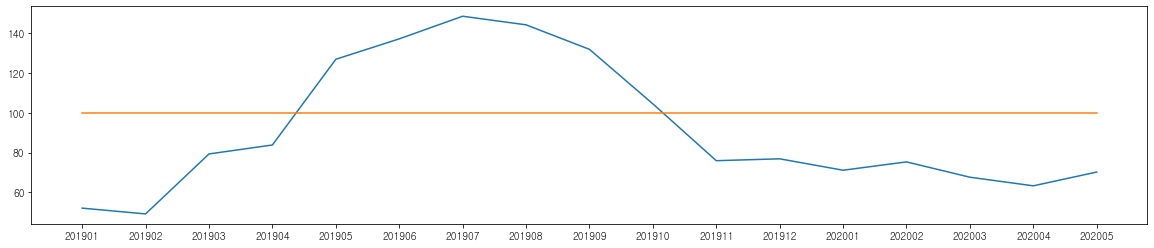

In [16]:
# 성장지수 변화 그래프
get_plot('동작구', 'all', 'all', '빙과류')

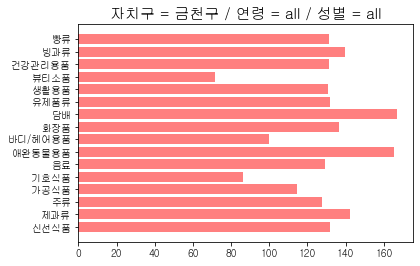

In [14]:
# 한 시점에서의 전품목 성장지수
get_plot2('금천구', 'all', 'all', 201905)

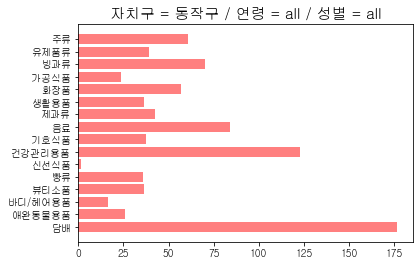

In [53]:
get_plot2('동작구', 'all', 'all', 202005)